### BREAST CANCER DETECTION USING THE WISCONSIN DATA SET

How was breast cancer diagnosed in this study? Diagnosis of breast cancer is traditionally done by a full biopsy which is an invasive surgical method. A less invasive method called Fine Needle Biopsy (FNB), allows for examination of a small amount of tissue from the tumor.

This dataset was obtained by analyzing the cell nuclei characteristics of 569 images obtained by Fine Needle Aspiration of the breast mass. Each of the images are classified(diagnosed) as being “Benign” or “Malignant”.



The data set is downloadable here: [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

#### Import Relevant Libraries

In [36]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import warnings
warnings.filterwarnings('ignore')

#### Load the data and check its properties

In [38]:
import pandas as pd
# Define the column names based on the dataset description
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Step 1: Read the data file into a DataFrame with the correct delimiter
df = pd.read_csv('/home/gloria/Documents/DATA/Breast-Cancer-Detection/DATA/Breast Cancer Prediction/breast+cancer+wisconsin+diagnostic/wdbc.data', delimiter=',', header=None)

# Step 2: Assign the column names to the DataFrame
df.columns = columns

# Step 3: Display the first few rows of the dataframe to verify
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The diagnosis column has M and B. M shows that the final result obtained means that the nuclei obtained was malignant ie cancerous while B shows its Benign ie non cancerous.

In [39]:
df.shape

(569, 32)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The data set contains no missing values and most of the coumns are in the correct data type

In [41]:
df.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


10 features can be obtained from observing a single nucleus cell: 

*radius (mean of distances from center to points on the perimeter)

texture (standard deviation of gray-scale values)

perimeter

area

smoothness (local variation in radius lengths)

compactness (perimeter² / area — 1.0)

concavity (severity of concave portions of the contour)

concave points (number of concave portions of the contour)

symmetry

fractal dimension (“coastline approximation” — 1)*

The features in the dataset (columns 3-32) aim to capture this cellular diversity within the sample. They provide information about:
Average Properties (Mean Features): These represent the average values (e.g., average size, average texture) across all the cells in the sample.

Variation Within the Sample (Standard Error Features): These indicate how much individual cell measurements deviate from the average (mean). A higher standard error suggests more variation in cell properties.

Extreme Values (Worst Features): These capture the most extreme values (largest size, highest roughness) observed in any cell within the sample.

#### Data Preprocessing

Mapping 1 and 0 to the Diagnosos Column. Malignant will be mapped to 1 whereas Benign will be mapped to 0

In [42]:
print("Malignant= 1, Benign = 0")
df["Diagnosis"]= df["Diagnosis"].map(lambda row: 1 if row=='M' else 0)

Malignant= 1, Benign = 0


In [43]:
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Data Analysis

Countplot to show distribution of the Benign and Malignant over the whole dataset

In [45]:
#Plot the number of data points with mailgnant and benign as their diagnosis
print("Total number of data points =  ", len(df))
print("Malignant (diagnosis =1) = {}%".format(round(df["Diagnosis"].mean(),3)*100))
                             
print("Benign (diagnosis =0)= {}%".format((1-round(df["Diagnosis"].mean(),3))*100))


Total number of data points =   569
Malignant (diagnosis =1) = 37.3%
Benign (diagnosis =0)= 62.7%


Creating a bar chart that displays the number of data points (unique IDs) for each diagnosis category (malignant and benign) in the dataset. 

<Axes: title={'center': 'Malignant (1) vs Benign Data(0) points'}, xlabel='Diagnosis', ylabel='Number of data points'>

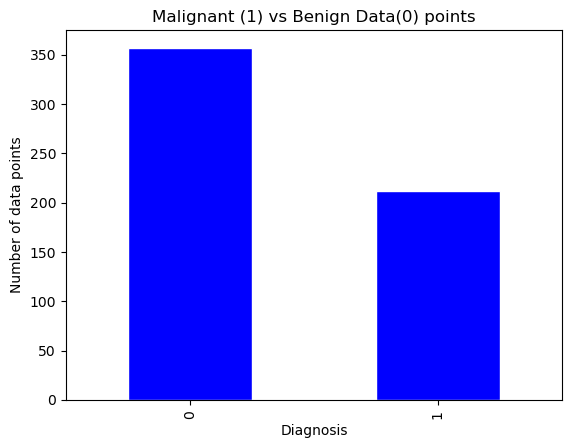

In [48]:
df.groupby("Diagnosis")['ID'].count().plot.bar(ylabel = "Number of data points", title = "Malignant (1) vs Benign Data(0) points", color = 'blue', edgecolor = "white")

There is not such an imbalance on the data between the 2 diagnoses

Using the mean value columns to create a pair plots and check the distribution of the features using a diagnostic hue.

Also checking the distribution oor the data if it is a normal curve before plotting a correlation matrix 

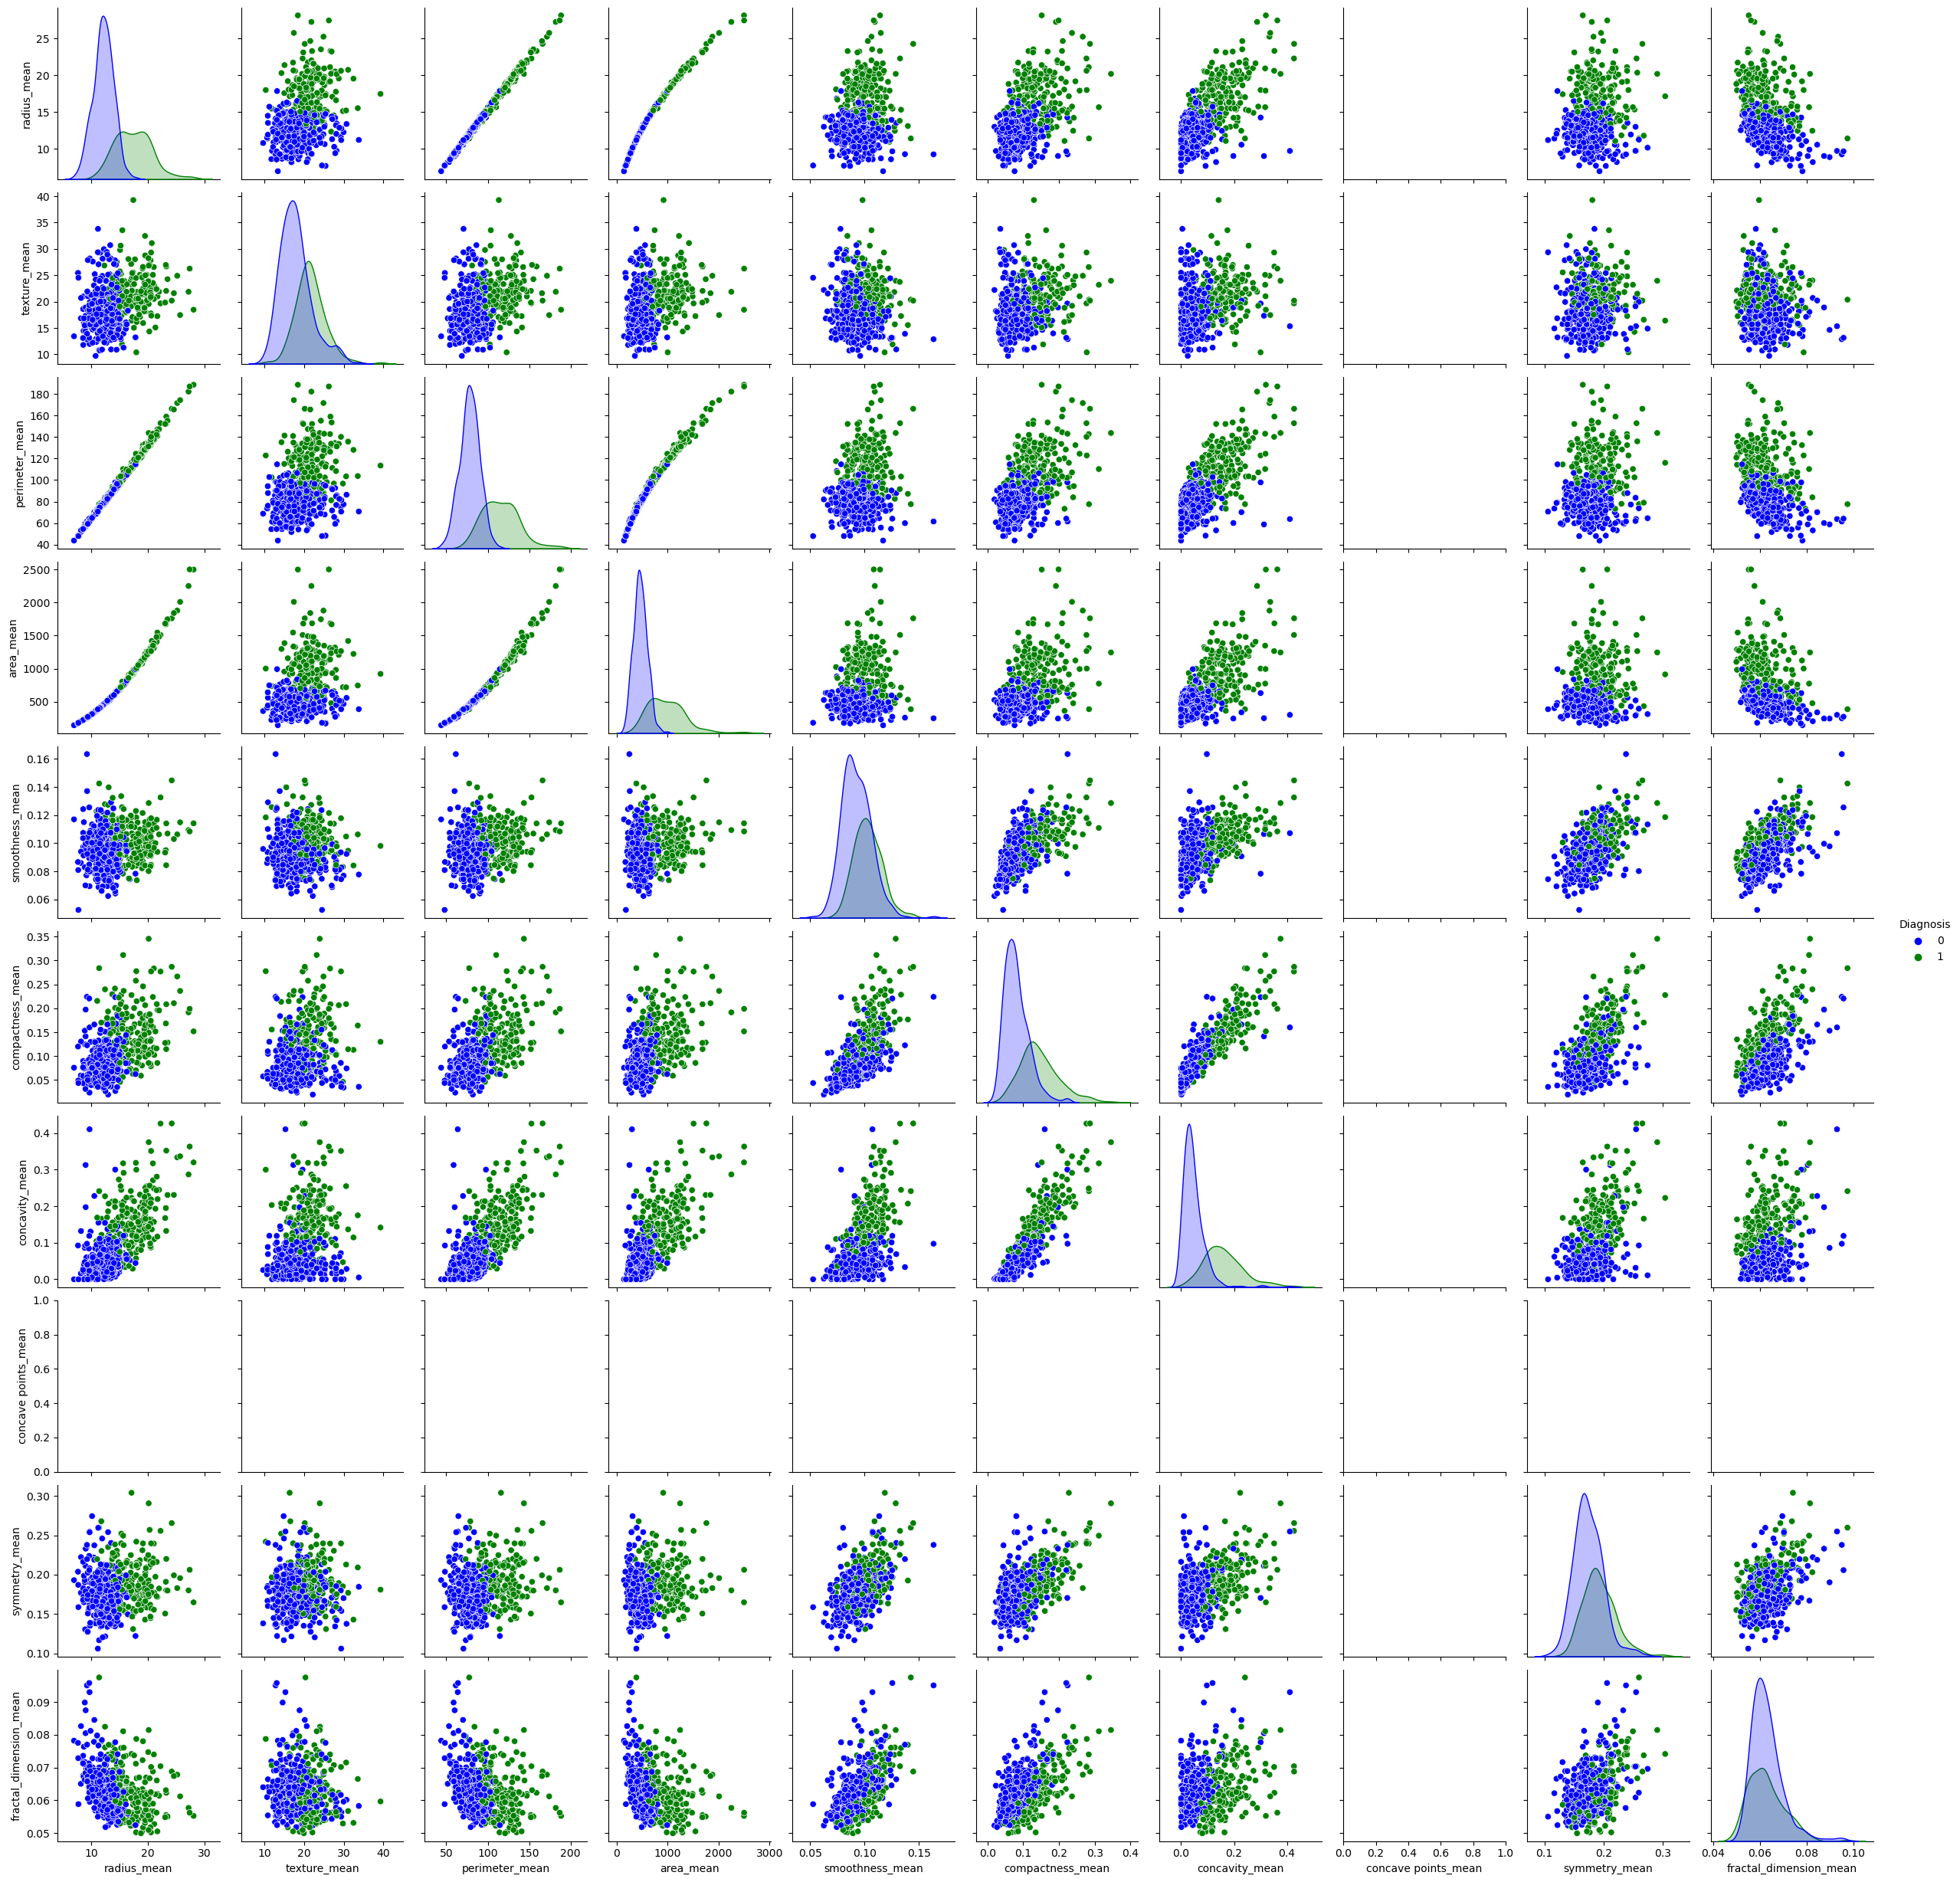

In [54]:
columns_mean=('Diagnosis', 'radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')
df_mean = pd.DataFrame(df,columns = columns_mean)
sns.pairplot(df_mean, hue = "Diagnosis", diag_kind='kde',palette = ["blue","green"])